# TA Review 6

## FINM 36700 - 2023

### UChicago Financial Mathematics

* Younghun Lee
* hun@uchicago.edu

In [11]:
from functools import partial
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

import sys
if '../cmds/' not in sys.path:
    sys.path.append('../cmds/')
from TA_utils import *
from portfolio import *

import warnings
warnings.filterwarnings("ignore")

## Lecture Review


### 1. Time-Diversification

Correlation of bonds:
- Treausry bond have higher covariance. Why? We know the price today relates to the future return. 
- Two return series of treasury have substantial negative autocorrelation between the time, becuase the overall return is fixed.

Time diversification: 
- Diversification: Instead of holding single asset, holding several assets reduce correlation. 
- Time diversification: Doing it with a same assets, but in the different time. It's diversification from different time period.

Time cummulate:
- Average return: more concentraded
- Total cummulative return: would be more volatile, sprad out
- Sharpe increase becuase mean return is scaling linearly, whereas volatility is scaling by sub-linearly
<!-- 
### 2. APT
Time Series Regression: we don't care alpha

Cross Sectional Regression:
- We are checking R^2. As more factor, it should go up. Error has to go down.
- If the assumption is correct, no alpha. But actually there could be something over it, so we include alpha -->

### 2. Factors
#### Fama French 5 factors: 

The Fama/French 5 factors (2x3) are constructed using the 6 value-weight portfolios formed on size and book-to-market, the 6 value-weight portfolios formed on size and operating profitability, and the 6 value-weight portfolios formed on size and investment.

- MKT: market portfolio, explains the market risk

- SMB: Long small and short big

- HML = 1/2 (Small Value + Big Value) - 1/2 (Small Growth + Big Growth).

- RMW (operating profitability) = 1/2 (Small Robust + Big Robust) - 1/2 (Small Weak + Big Weak).	 

- CMA (investment spending) = 1/2 (Small Conservative + Big Conservative) - 1/2 (Small Aggressive + Big Aggressive).

#### Momentum Factor (UMD):
 - Momentum of AQR: the phenomenon that stocks which have performed well in the past relative to other stocks (winners) continued to perform well in the future, and stocks that have performed relatively poorly (losers) continue to perform poorly

 - Pre-ranking period of 12 months (winning/losing stock in the past 12 months), t-12 to t-2 in this AQR setting.

 - Why skip the prior month (t-1)? Reversal may affect the ranking.

 - Momentum wasn't since people thought it's behavioral or noise. Also, people thought it will lose power after paper comes out, but it wasn't.

AQR's 

In [2]:
read_excel = partial(pd.read_excel, index_col=0, parse_dates=[0], io='../data/factor_pricing_data.xlsx')

factors = read_excel(sheet_name='factors (excess returns)')
portfolios = read_excel(sheet_name='portfolios (excess returns)')

<Axes: >

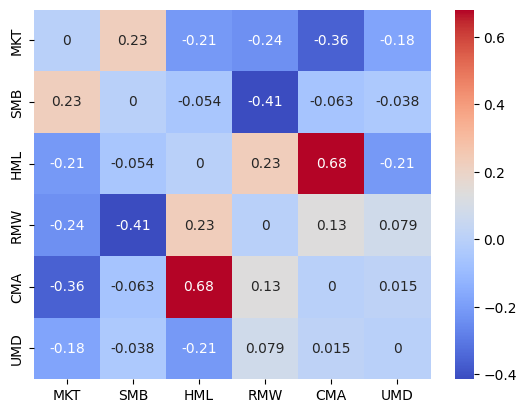

In [8]:
sns.heatmap(factors.corr() -np.eye(6), annot=True, cmap='coolwarm')

#### AQR model (Carhart 4 factor model): 

 - CMA is unnessary if you measure Value factor correctly. Measure value in clever way, we don't need CMA factor.

 - For size factor, if you have value and momentum, it seems not adding nothing. Size is improving mv-optimization. Fundamental theory of asset priicng: tangency portfolio reveal which factor is related by LFP.

 - So, Market, Value and Momentum are important. 

 - Size was important early on, but it's factor dacay. Once people know, then it's not profitable. 

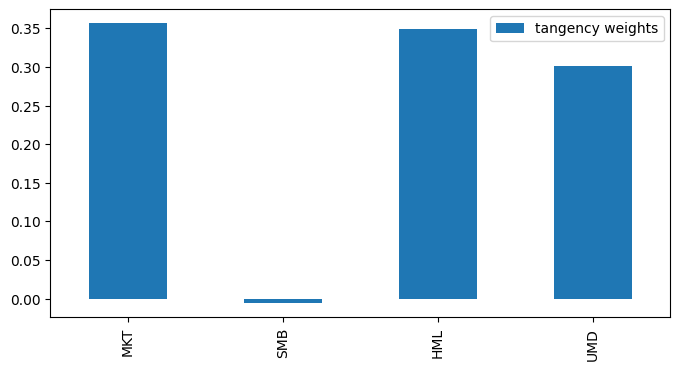

In [10]:
fig = plt.figure(figsize=(8,4))
ax1=fig.add_subplot(1,1,1)
tangency_weights(factors[['MKT','SMB','HML','UMD']]).plot.bar(ax=ax1);

## 2. Investigating Momentum

In [15]:
raw_data = pd.read_excel('../data/momentum_data.xlsx',sheet_name = None)
sheets = list(raw_data.keys())

ff_factors = raw_data[sheets[1]].set_index('Date')
momentum = raw_data[sheets[2]].set_index('Date')
mom_deciles = raw_data[sheets[3]].set_index('Date')
tercile_port = raw_data[sheets[4]].set_index('Date')
rf = raw_data[sheets[5]].set_index('Date')

ff_factors['UMD'] = momentum['UMD']

In [16]:
ff_factors

,MKT,SMB,HML,UMD
Date,,,,
1927-01-31,-0.0006,-0.0037,0.0454,0.0036
1927-02-28,0.0418,0.0004,0.0294,-0.0214
1927-03-31,0.0013,-0.0165,-0.0261,0.0361
1927-04-30,0.0046,0.0030,0.0081,0.0430
1927-05-31,0.0544,0.0153,0.0473,0.0300
...,...,...,...,...
2023-03-31,0.0251,-0.0551,-0.0885,-0.0249
2023-04-30,0.0061,-0.0335,-0.0004,0.0163
2023-05-31,0.0035,0.0161,-0.0772,-0.0063


In [17]:
tercile_port

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR
Date,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718
...,...,...,...,...,...,...
2023-03-31,-0.0631,-0.0513,-0.0458,0.0764,0.0215,0.0093
2023-04-30,-0.0302,-0.0259,-0.0145,0.0042,0.0124,0.0212
2023-05-31,-0.0043,-0.0224,0.0082,0.0502,-0.0073,0.0251


In [18]:
temp = tercile_port.copy()
temp.columns = pd.MultiIndex.from_product([['SMALL', 'BIG'], ['Lo', 'Me', 'Hi']])
temp.columns.names = ['Size','Momentum']
temp.mean().unstack()

Momentum,Hi,Lo,Me
Size,,,
BIG,0.012018,0.007052,0.009157
SMALL,0.015831,0.008337,0.012553


The Fama-French momentum return

$$\tilde{r}^{mom:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − \frac{1}{2} (\tilde{r}^{momBD} + \tilde{r}^{momSD}) $$

<Axes: xlabel='UMD'>

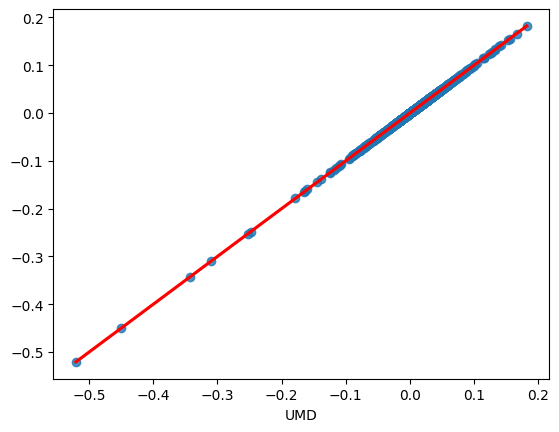

In [19]:
y2 = (tercile_port[['BIG HiPRIOR', 'SMALL HiPRIOR']].sum(axis=1) - tercile_port[['SMALL LoPRIOR', 'BIG LoPRIOR']].sum(axis=1))/2

sns.regplot(x=ff_factors['UMD'], y=y2, line_kws={"color": "red"})

### 2.1. Is Momentum sill profitable?


In [90]:
periods = [['1927', '2022'], ['1927', '1993'], ['1994', '2008'], ['2009', '2023']]
names = ['Annualized Return','Annualized Volatility','Annualized Sharpe Ratio','Skewness']
res = []
for period in periods:
    temp = momentum.loc[period[0]:period[1]]
    temp_ff = ff_factors.loc[period[0]:period[1]]
    summary = calc_performance_metrics(temp)[names]
    summary['mkt_corr'] = temp_ff.corr().loc['MKT',['UMD']]
    summary['val_corr'] = temp_ff.corr().loc['HML',['UMD']]
    summary = summary.T.iloc[:,0].rename(f'{period[0]} - {period[1]}')
    res.append(summary)
summary  = pd.concat(res, axis=1).T
summary

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Skewness,mkt_corr,val_corr
1927 - 2022,0.077722,0.162541,0.478168,-3.015420,-0.344409,-0.414919
1927 - 1993,0.090113,0.159991,0.563242,-3.808977,-0.362537,-0.494960
1994 - 2008,0.104373,0.175551,0.594548,-0.582038,-0.234519,-0.129402
2009 - 2023,-0.026030,0.161623,-0.161052,-2.698287,-0.385511,-0.309380


- Has momentum changed much over time?: Not in the most of the periods. But showing negative return after 2009

-  Does this data support AQR's argument that momentum is an important piece of the ideal portfolio? : 

-  What if mean returns to momentum are in actuality near zero due to transaction costs would there still be evidence here that momentum is valuable?

### 2.2. Whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

$$\tilde{r}^{momU:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − r^f $$

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

$$\tilde{r}^{momU} = \frac{1}{3} (\tilde{r}^{mom(8)} + \tilde{r}^{mom(9)} + \tilde{r}^{mom(10)}) − r^f $$


For the question below, use the FF-style $\tilde{r}^{momU:FF}_t$


a) Fill out Table 2 for the data in the period 1994-2022.


<Axes: >

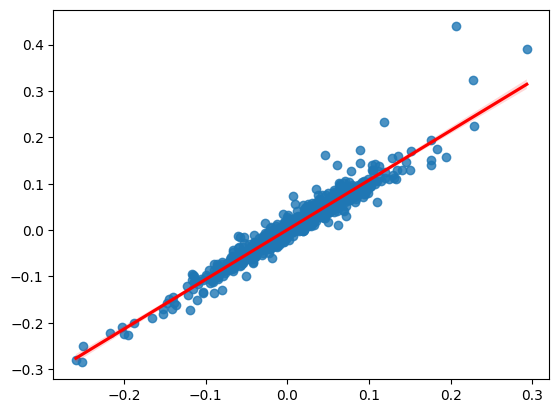

In [34]:
mom_long = (tercile_port['BIG HiPRIOR'] + tercile_port['SMALL HiPRIOR'])/2 - rf['RF']
mom_long_2 = mom_deciles.iloc[:,-3:].mean(axis=1) - rf['RF']

sns.regplot(x=mom_long_2, y=mom_long, line_kws={"color": "red"})

In [65]:
mom_names = ['long_and_short','long_only']

temp = ff_factors.copy().rename(columns={'UMD':'long_and_short'})
temp['long_only']  = mom_long
summary = calc_performance_metrics(temp.loc["1994":, mom_names])[names]
summary['mkt_corr'] = temp.corr().loc['MKT', mom_names]
summary['val_corr'] = temp.corr().loc['HML', mom_names]
summary

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Skewness,mkt_corr,val_corr
long_and_short,0.040090,0.169641,0.236324,-1.437432,-0.346337,-0.404836
long_only,0.115447,0.178350,0.647306,-0.463528,0.935680,0.210498


1. Is long-only attractive?

2. Does long-only momentum have diversification benefit?

<Axes: xlabel='Date'>

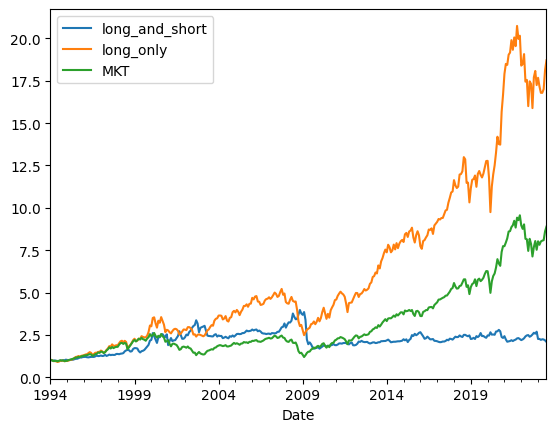

In [75]:
(1 + temp[mom_names + ['MKT']].loc['1994':]).cumprod().plot()

### 2.3. Is momentum just data mining, or is it a robust strategy?

Assess how sensitive the threshold for the “winners” and “losers” is in the results. Specifically, we compare three constructions:

- long the top 1 decile and short the bottom 1 deciles:

$$ \tilde{r}^{momD1} = r^{mom(10)} - r^{mom(1)}$$

- long the top 3 deciles and short the bottom 3 deciles:


$$ 
\begin{aligned}
\tilde{r}^{momD3} &= \frac{1}{3}(r^{mom(8)} + r^{mom(9)} + r^{mom(10)}) - \frac{1}{3} (r^{mom(3)} + r^{mom(2)} + r^{mom(1)})\\
&= \frac{1}{3}\sum_{k = 8}^{10} r^{mom(k)} - \frac{1}{3}\sum_{k = 1}^{3} r^{mom(k)} 
\end{aligned}$$


- long the top 5 deciles and short the bottom 5 decile:

$$ \tilde{r}^{momD5} = \frac{1}{5}\sum_{k = 6}^{10} r^{mom(k)} - \frac{1}{5}\sum_{k = 1}^{5} r^{mom(k)} $$

In [76]:
ls_1decile = mom_deciles['Hi PRIOR'] - mom_deciles['Lo PRIOR']
ls_3decile = mom_deciles.iloc[:,-3:].mean(axis = 1) - mom_deciles.iloc[:,:3].mean(axis = 1)
ls_5decile = mom_deciles.iloc[:,-5:].mean(axis = 1) - mom_deciles.iloc[:,:5].mean(axis = 1)

In [88]:
ls_names = ['mom_D1','mom_D3','mom_D5']

temp = ff_factors.copy()
temp[ls_names] = pd.concat([ls_1decile, ls_3decile, ls_5decile], axis=1)
summary = calc_performance_metrics(temp.loc["1994":, ls_names + ['UMD']])[names]
summary['mkt_corr'] = temp.corr().loc['MKT', ls_names + ['UMD']]
summary['val_corr'] = temp.corr().loc['HML', ls_names + ['UMD']]
summary

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Skewness,mkt_corr,val_corr
mom_D1,0.074873,0.298583,0.250762,-1.307240,-0.372584,-0.400235
mom_D3,0.024814,0.194199,0.127774,-1.350529,-0.384224,-0.393174
mom_D5,0.013016,0.134476,0.096792,-1.428013,-0.364508,-0.388217
UMD,0.040090,0.169641,0.236324,-1.437432,-0.346337,-0.404836


1. Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture? : 
   
   Yes, we can see LS portfolio with higher threshold has higher return, but also higher volatility.

2. Should AQR's retail product consider using a 1-decile or 5-decile construction?

   We would recommend 1-decile, as it has higher sharpe.

3. Does $\tilde{r}^{momD3}$ have similar stats to the Fama-French construction in (1). 

   1. Recall that construction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. 
   2. Compare the middle row of Table 3 with the top row of Table 2.

   

### 2.4. Does implementing momentum require trading lots of small stocks-- thus causing even larger trading costs?

For regulatory and liquidity reasons, AQR is particularly interested in using larger stocks for their momentum baskets. (Though they will launch one product that focuses on medium-sized stocks.)

Use the data provided on both small-stock “winners”, $r^{momSU}$, and small-stock “losers”, $r^{momSD}$, to construct a small-stock momentum portfolio,

$$ r^{momS}_t = r^{momSU}_t - r^{momSD}_t $$

Similarly, use the data provided to construct a big-stock momentum portfolio,

$$ r^{momB}_t = r^{momBU}_t − r^{momBD}_t $$

In [91]:
mom_small = tercile_port['SMALL HiPRIOR'] - tercile_port['SMALL LoPRIOR']
mom_large = tercile_port['BIG HiPRIOR'] - tercile_port['BIG LoPRIOR']

In [95]:
mom_size_name = ['Small_stocks','Big_stocks']

temp = ff_factors.copy()
temp[mom_size_name] = pd.concat([mom_small, mom_large], axis=1)
summary = calc_performance_metrics(temp.loc["1994":, ['UMD'] + mom_size_name])[names]
summary['mkt_corr'] = temp.corr().loc['MKT', ['UMD'] + mom_size_name]
summary['val_corr'] = temp.corr().loc['HML', ['UMD'] + mom_size_name]
summary.rename({'UMD':'All_stocks'})

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio,Skewness,mkt_corr,val_corr
All_stocks,0.040090,0.169641,0.236324,-1.437432,-0.346337,-0.404836
Small_stocks,0.059358,0.171924,0.345256,-1.744008,-0.332939,-0.388788
Big_stocks,0.020799,0.183927,0.113082,-0.877121,-0.327545,-0.383182


1. Is the attractiveness of the momentum strategy mostly driven by the small stocks? 
   1. That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?

According to various theories, small cap stocks carry higher risk premia due to their size and illiquidity and thus may have higher expected returns and do well for a momentum strategy. But, they do come with a lot of nuances of higher transaction costs and difficulty in trading them.

### 2.5. In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

- It captures a risk premia similar to Fama-French in their long-short momentum strategy using size buckets. 

- AQR's retail product uses a long only approach which leads to a higher correlation with the Market and has less diversification benefits compared to the Momentum factor (of FF).

### Interview Quiz


#### 1. A fund have a shape ratio of 2. How long will it take to make money, with 95% confidence?

Sol)

$$\mu/\sigma = 2$$

$$\mu_t / \sigma_t = 2\sqrt{t}$$

$$P(r_t > 0) = P(z > -2\sqrt{t}) = 95\%$$

$$2\sqrt{t} = 1.65$$

$$t = 0.68$$

Thus, 252 * t = 171 days

#### 2. Let $X_1,X_2, \ldots$ as an infinite sequence of random variable where each $X_i \sim_{iid} Uni(0,1)$. Then what is $E[N]$ where $N  = min\{n: X_1+ … + X_n > 1\}$?

Sol)

$$P(N > i) = P(X_1+ … +X_i <=1 ) = \frac{1}{i!}$$
then $$P(N = i) = P(N > i-1) - P(N > i) = 1/(i-1)! - 1/i! = (i-1) / i!$$ 

$$E[N] = \sum_{i=2}^\infty i P(N=i) = \sum_{i=2}^\infty \frac{1}{(i-2)!} = 1 + 1 + 1/2! + 1/3! + \cdots = e$$


#### 3. If X and Y are perfectly correlated, what is the correlation of X+Y and X-Y?

Sol)

$$
\begin{aligned}
\sigma^2_{X \pm Y} & =\sigma^2_X+\sigma^2_Y \pm 2 \sigma_{X, Y} \\&=\sigma^2_X+\sigma^2_Y \pm 2 \sigma_X \sigma_Y \\
&= (\sigma_X \pm \sigma_Y)^2 \\
\sigma_{X+Y, X-Y} & =\sigma^2_X-\sigma^2_Y + \sigma_X \sigma_Y - \sigma_X \sigma_Y\\
&= \sigma^2_X-\sigma^2_Y
\end{aligned}
$$
As such,
$$
\rho_{X+Y, X-Y} = \frac{\sigma^2_X-\sigma^2_Y}{(\sigma_X + \sigma_Y) (\sigma_X -\sigma_Y)} = 1
$$

#### 4. A fair 6-sided die is rolled repeatedly until a 6 is obtained. Find the expected number of rolls conditioned on the event that none of the rolls yielded an odd number.

Sol) 3/2


Equivalent question: What is the expected number of times you can roll only 2’s or 4’s until you roll any other number?

Let N be the number of times you roll only 2’s or 4’s until you roll any other number. Let X be the die number on that last roll (i.e. the roll which came up something other than a 2 or 4). Obviously, X and N are independent,

$$\mathbb{E}(N)=\mathbb{E}(N \mid X)$$

ref) https://math.stackexchange.com/questions/2463768/understanding-the-math-behind-elchanan-mossel-s-dice-paradox